# String-to-String Alignment Problems and Algorithms

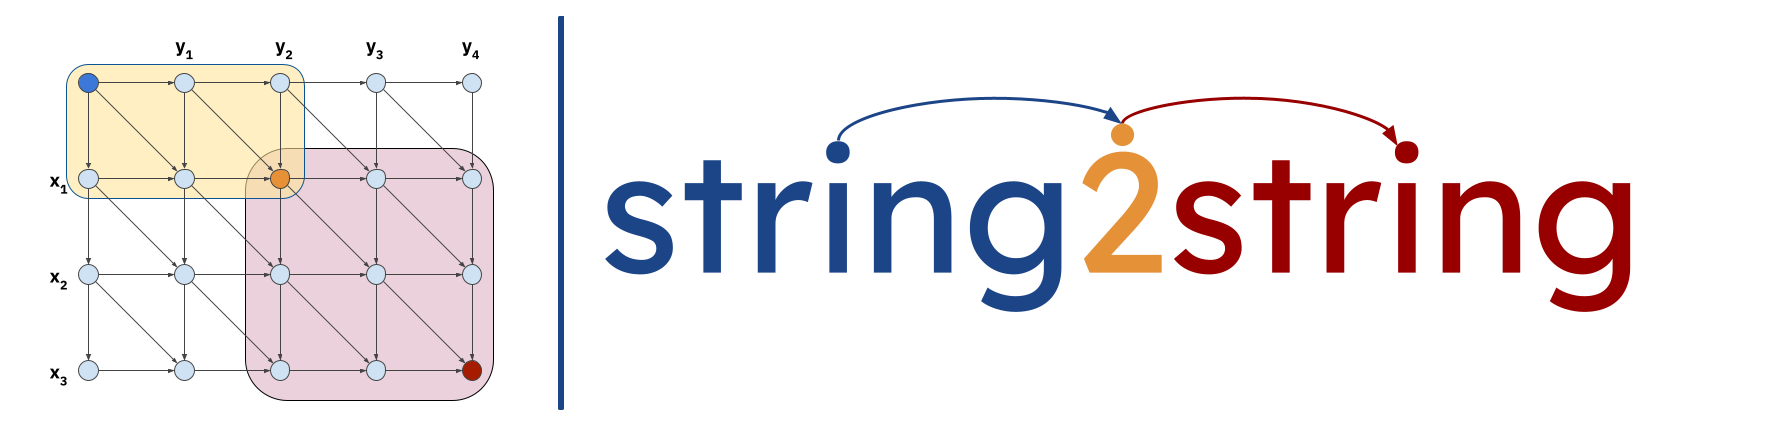

In [1]:
from IPython.display import Image
Image(filename='fables/string2string-logo.png')
# Image(url='https://raw.githubusercontent.com/suzgunmirac/string2string/main/fables/string2string-logo.png?token=GHSAT0AAAAAAB5KHQETSF3UOOWXYPJHECZAZAXW5HA')

This tutorial provides an introduction to the **alignment** module in the **string2string** package, and presents a few examples to showcase its usage. While it is not an exhaustive overview of the module, it offers insights into its key functionalities. For a more comprehensive understanding of the module, please consult the official documentation.

Pairwise string alignment is the problem of identifying an optimal alignment between two strings, such as nucleotide sequences in DNA or paragraphs in a text. This task involves aligning them in such a way that maximizes the number of matching symbols while allowing for gaps or mismatches where necessary. Pairwise string alignment is a widely-used technique that plays a crucial role in tasks such as DNA sequence alignment, database searching, and phylogenetic analysis. 

The string2string package currently offers the following alignment functionalities:

* Needleman-Wunsch for global alignment
* Smith-Waterman for local alignment
* Hirchberg's algorithm for linear space global alignment
* Longest common subsequence
* Longest common substring
* Dynamic time warping (DTW) for time series alignment

Before we begin, please make sure that you have installed the string2string packag via *pip*.

In [2]:
# !pip install string2string

## Needleman-Wunsch Algorithm for Global Alignment

The Needleman-Wunsch algorithm is a dynamic programming algorithm—commonly used in bioinformatics—to perform global alignment between two sequences, such as DNA or protein sequences. 

We can compute the global alignment between two strings using the Needleman-Wunsch algorithm in our library as follows:

In [14]:
# Import the NeedlemanWunsch class from the alignment module
from string2string.alignment import NeedlemanWunsch

# Create an instance of the NeedlemanWunsch class
nw = NeedlemanWunsch()

# Define two strings (e.g., DNA sequences)
seq1 = 'GATTACA'
seq2 = 'GCATGCU'

# Compute the alignment between two strings
aligned_seq1, aligned_seq2, score_matrix = nw.get_alignment(seq1, seq2, return_score_matrix=True)

# Print the alignment
print(f'Here is the alignment between "{seq1}" and "{seq2}", as computed by the Needleman-Wunsch algorithm:')
nw.print_alignment(aligned_seq1, aligned_seq2)

Here is the alignment between "GATTACA" and "GCATGCU", as computed by the Needleman-Wunsch algorithm:
G | - | A | T | T | A | C | A
G | C | A | - | T | G | C | U


#### Visualization of the Alignment Path

The **misc** module in the string2string package includes a **plot_pairwise_alignment** function, which can be used to generate a visualization of pairwise sequence alignments.

To use the function, provide a pair of sequence lists along with their alignments as inputs, and the function will produce a clear and informative plot of the alignment.

For an example of how to use the plot_pairwise_alignment function, let's look at the code snippet below.

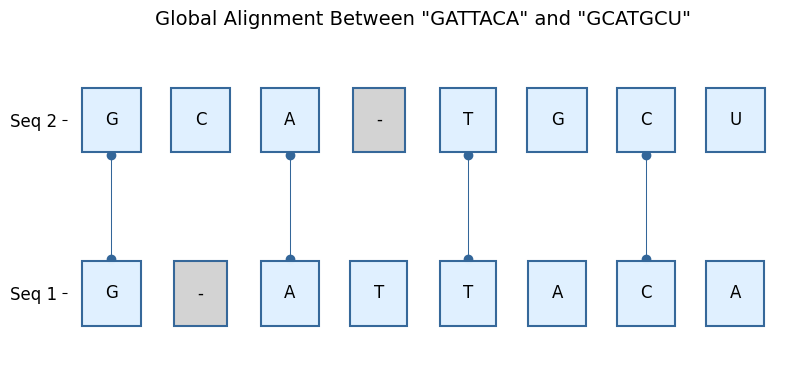

In [6]:
# First we need to import the necessary functions from the misc module for visualizing the pairwise alignment
from string2string.misc.plotting_functions import plot_pairwise_alignment

# Then let's the alignment path and indidivual aligned parts
alignment_path, aligned_seq1_parts, aligned_seq2_parts = nw.get_alignment_strings_and_indices(aligned_seq1, aligned_seq2)

# Finally, let's visualize the pairwise alignment
plot_pairwise_alignment(
    seq1_pieces = aligned_seq1_parts,
    seq2_pieces = aligned_seq2_parts,
    alignment = alignment_path,
    str2colordict = {'-': 'lightgrey'}, # color the gaps in the second string as light grey
    title = 'Global Alignment Between "GATTACA" and "GCATGCU"',
    seq1_name = 'Seq 1',
    seq2_name = 'Seq 2',
)


To add color to a plot alignment based on the type of the element (e.g., 'A' is colored crimson, 'G' is green, etc.), a dictionary can be provided to the str2colordict parameter of the plot_pairwise_alignment function.

This feature is useful when you want to visually distinguish between different types of elements in the aligned sequences. Simply provide a dictionary mapping each element type to a specific color and the function will generate a colorful and informative plot.

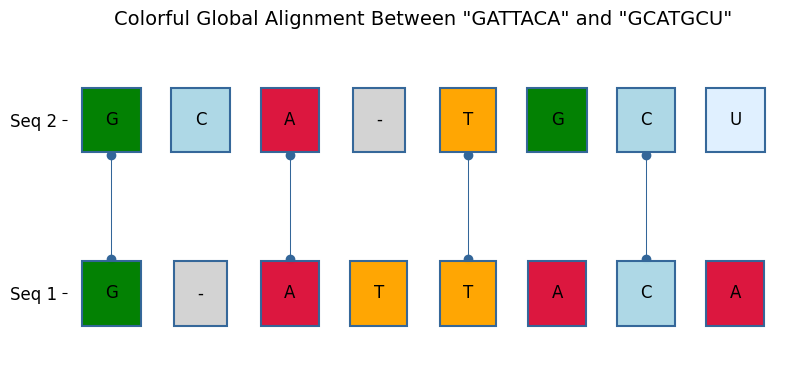

In [7]:
# Let's specify the color dictionary for the characters in the alignment
color_dict = {
    'A': 'crimson',
    'C': 'lightblue',
    'G': 'green',
    'T': 'orange',
    '-': 'lightgray',
}

# Then let's visualize the pairwise alignment again, but this time with the color dictionary
plot_pairwise_alignment(
    seq1_pieces = aligned_seq1_parts,
    seq2_pieces = aligned_seq2_parts,
    alignment = alignment_path,
    str2colordict = color_dict,
    title = 'Colorful Global Alignment Between "GATTACA" and "GCATGCU"',
    seq1_name = 'Seq 1',
    seq2_name = 'Seq 2',
)

We can also visualize the score matrix:

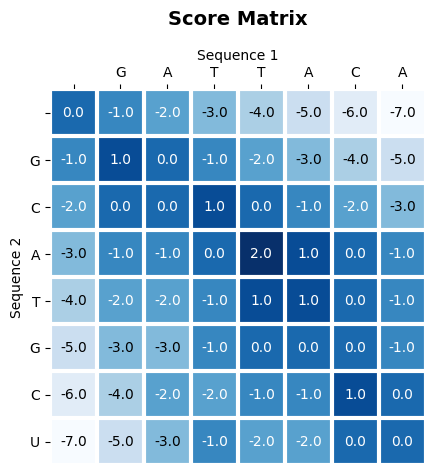

In [24]:
from string2string.misc.plotting_functions import plot_heatmap

plot_heatmap(
    score_matrix, 
    title='Score Matrix', 
    x_ticks= ' ' + seq1,  # Note that ' ' (space) is added to denote the insertion/deletion at the beginning
    y_ticks= ' ' + seq2,  # Note that ' ' (space) is added to denote the insertion/deletion at the beginning
    x_label='Sequence 1',
    y_label='Sequence 2',
    cmap="Blues",
    )

#### Alignment at More Complex Levels

One of the key advantages of our string2string library is its ability to compute alignment not only at the character level but also at more complex levels by passing *lists of strings* (say, tokens or DNA sequence chunks) to the function as inputs.

This is a powerful feature that allows for more sophisticated text analysis, particularly when dealing with tokenized or segmented data. To implement this, simply pass lists of strings instead of individual strings to the alignment functions, and our library will handle the rest.

To better understand this functionality, let us look at the example below, which demonstrates how to compute alignment at a non-character level using our library.

In [8]:
# Let's create a list of strings (resembling DNA sequences), but they can be any strings (e.g., words), of course.
seq1 = ['X', 'ATT', 'GC', 'GC', 'A', 'A', 'G']
seq2 = ['ATT', 'G', 'GC', 'GC', 'A', 'C', 'G']

# Compute the alignment between two strings
aligned_seq1, aligned_seq2 = nw.get_alignment(seq1, seq2)

# Print the alignment
print(f'Here is the alignment between "{seq1}" and "{seq2}", as computed by the Needleman-Wunsch algorithm:')
nw.print_alignment(aligned_seq1, aligned_seq2)

Here is the alignment between "['X', 'ATT', 'GC', 'GC', 'A', 'A', 'G']" and "['ATT', 'G', 'GC', 'GC', 'A', 'C', 'G']", as computed by the Needleman-Wunsch algorithm:
X | ATT | - | GC | GC | A | A | G
- | ATT | G | GC | GC | A | C | G


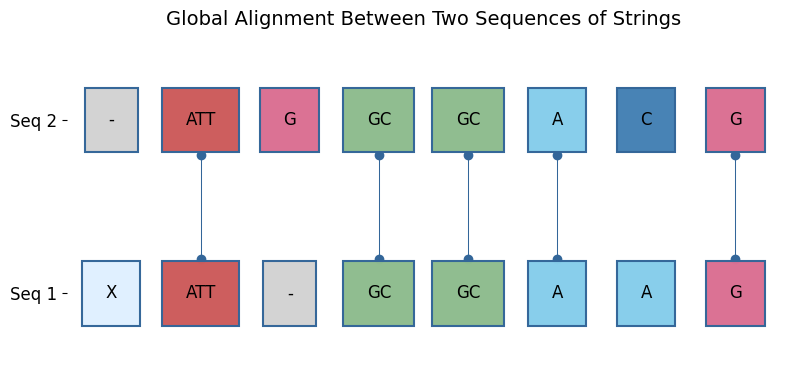

In [9]:
# Then let's the alignment path and indidivual aligned parts
alignment_path, aligned_seq1_parts, aligned_seq2_parts = nw.get_alignment_strings_and_indices(aligned_seq1, aligned_seq2)

# Finally, let's visualize the pairwise alignment
plot_pairwise_alignment(
    seq1_pieces = aligned_seq1_parts,
    seq2_pieces = aligned_seq2_parts,
    alignment = alignment_path,
    str2colordict = {'-': 'lightgray', 'ATT': 'indianred', 'GC': 'darkseagreen', 'A': 'skyblue', 'G': 'palevioletred', 'C': 'steelblue'},
    title = 'Global Alignment Between Two Sequences of Strings',
)

### Smith-Waterman for Local Alignment

The Smith-Waterman algorithm, known to be a close friend of the Needleman-Wunsch algorithm, is too a dynamic programming algorithm commonly used in bioinformatics. But it is used to perform *local* alignment between two sequences.

We can compute the local alignment between two strings using the Smith-Waterman algorithm in our library as follows:

In [10]:
# Import the SmithWaterman class from the alignment module
from string2string.alignment import SmithWaterman

# Create an instance of the SmithWaterman class
sw = SmithWaterman(
    match_weight=1, # weight for a match
    mismatch_weight=-1, # weight for a mismatch
    gap_weight=-1, # weight for a gap
    gap_char='-' # character to use for a gap
)

# Define two strings (e.g., DNA sequences)
seq1 = 'GAGTCGCTACTATGGGCCCGCTAC'
seq2 = 'TTAGCCTATGCACCTATCGGTCAAC'

# Compute the local alignment between them using the Smith-Waterman algorithm
aligned_seq1, aligned_seq2, score_matrix = sw.get_alignment(seq1, seq2, return_score_matrix=True)

# Print the alignment
print(f'Here is the local alignment between "{seq1}" and "{seq2}", as computed by the Smith-Waterman algorithm:')
sw.print_alignment(aligned_seq1, aligned_seq2)

Here is the local alignment between "GAGTCGCTACTATGGGCCCGCTAC" and "TTAGCCTATGCACCTATCGGTCAAC", as computed by the Smith-Waterman algorithm:
G | C | T | A | - | C | T | A | T | - | G | G
G | C | - | A | C | C | T | A | T | C | G | G


We can visualize the local alignment as follows:

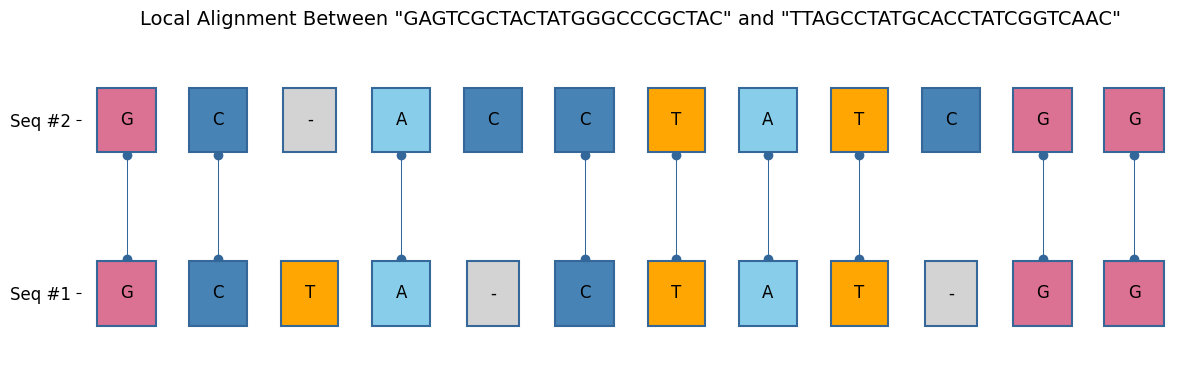

In [13]:
# Then let's the alignment path and indidivual aligned parts
alignment_path, aligned_seq1_parts, aligned_seq2_parts = sw.get_alignment_strings_and_indices(aligned_seq1, aligned_seq2)

# Finally, let's visualize the pairwise alignment
plot_pairwise_alignment(
    seq1_pieces = aligned_seq1_parts,
    seq2_pieces = aligned_seq2_parts,
    alignment = alignment_path,
    str2colordict = {'-': 'lightgray', 'A': 'skyblue', 'G': 'palevioletred', 'C': 'steelblue', 'T': 'orange'},
    title = f'Local Alignment Between "{seq1}" and "{seq2}"',
    seq1_name = 'Seq #1',
    seq2_name = 'Seq #2',
)


## Longest Common Subsequence (LCSubsequence)

Longest common subsequence (LCSubsequence) of two strings is a subsequence of maximal length that appears in both of them.

The following recurrence relation can be used to solve the LCSubsequence problem:

$$
    \begin{align}
        L[i,j] =
        \begin{cases}
            0 &\text{ if } i=0 \text{ or } j=0\\
            L[i-1,j-1]+1 &\text{ if } i,j>0 \text{ and } str1[i]=str2[j]\\
            \max(L[i-1,j],L[i,j-1]) &\text{ if } i,j>0 \text{ and } str1[i]\neq str2[j]\\
        \end{cases}
    \end{align}
$$

where $L[i,j]$ denotes the length of the LCSubsequence of the prefixes $\texttt{str1}[0:i]$ and $\texttt{str2}[0:j]$.  The solution to the problem is then given by $L[n,m]$, assuming that $\texttt{str1}$ and $\texttt{str2}$ have lengths $n$ and $m$, respectively.

The traditional dynamic programming solution to the longest common subsequence problem admits a quadratic time and space complexity. Our string2string library offers both the traditional dynamic programming solution, as well as a space-optimized version. Additionally, we provide recursive and recursive-memoized solutions to the problem.

The user can choose and use any of these methods by providing the name of the desired method as an argument to the compute function. By default, though, the space-optimized version of the dynamic programming solution to the LCSubsequence problem is used.

In [7]:
from string2string.alignment import LongestCommonSubsequence

# Create an instance of the LongestCommonSubsequence class
lcsubsequence = LongestCommonSubsequence()

length, candidates = lcsubsequence.compute(
    str1="abcdefghijklmnopqrstuvwxyz",
    str2="xzytawbvckjfhgslrqponmedui", 
    returnCandidates=True
)

# Print the length of the longest common subsequence
print(f'The length of the longest common subsequence is {length}.')

# Print the candidates
print(f'The candidates are {candidates}.')

The length of the longest common subsequence is 8.0.
The candidates are ['abcfglmu', 'abcfglqu', 'abcfhlru', 'abcfhlnu', 'abcfglpu', 'abcfhlmu', 'abcfglnu', 'abcfhlpu', 'abcfhlou', 'abcfglou', 'abcfglru', 'abcfhlqu'].


In [8]:
length, candidates = lcsubsequence.compute(
    str1="The quick brown fox jumps over the lazy dog.",
    str2="The five boxing wizards jump quickly.",
    returnCandidates=True
)

# Print the length of the longest common subsequence
print(f'The length of the longest common subsequence is {length}.')

# Print the candidates
print(f'The candidates are {candidates}.')

The length of the longest common subsequence is 19.0.
The candidates are ['The i bon  jump ly.'].


Like before, we can also make the comparisons at the word level:

In [9]:
from string2string.misc.default_tokenizer import Tokenizer

# Construct a default tokenizer, which splits a string into words by spaces
tokenizer = Tokenizer(word_delimiter=' ')

# The following texts are taken and modified from the Wikipedia page of John von Neumann
neumann_str1 = "Von Neumann made major contributions to many fields, including mathematics (mathematical logic, measure theory, functional analysis, ergodic theory, group theory, lattice theory, representation theory, operator algebras, matrix theory, geometry, and numerical analysis), physics (quantum mechanics, hydrodynamics & ballistics, nuclear physics and quantum statistical mechanics), economics (game theory and general equilibrium theory), computing (Von Neumann architecture, linear programming, numerical meteorology, scientific computing, self-replicating machines, stochastic computing), and statistics. He was a pioneer of the application of operator theory to quantum mechanics in the development of functional analysis, and a key figure in the development of game theory and the concepts of cellular automata, the universal constructor and the digital computer."

neumann_str2 = "Von Neumann made major contributions to many fields, including mathematics (logic, measure theory, group theory, lattice theory, representation theory, operator algebras, matrix theory), physics (quantum mechanics, nuclear physics and quantum statistical mechanics), economics (game theory and general equilibrium theory), computing (computer architecture, linear programming,  self-replicating machines, stochastic computing), and statistics, among many others. He was a pioneer of the application of operator theory to quantum mechanics, and a key figure in the development of game theory, the universal constructor and the digital computer."

tokenized_nemannn_str1 = tokenizer.tokenize(neumann_str1)
tokenized_neumann_str2 = tokenizer.tokenize(neumann_str2)

length, candidates = lcsubsequence.compute(
    str1=tokenized_nemannn_str1,
    str2=tokenized_neumann_str2,
    returnCandidates=False,
)

# Print the length of the longest common subsequence
print(f'The length of the longest common subsequence is {length}.')

# Print the candidates
print(f'The candidates are {candidates}.')

The length of the longest common subsequence is 74.0.
The candidates are None.


## Longest Common Substring (LCSubstring)

Longest Common Substring (LCSubstring) of two strings is a longest substring that appears in both of them.

The following recurrence relation can be used to solve the LCSubstring problem:

$$
    \begin{align}
        L[i,j] =
        \begin{cases}
            0 &\text{ if } i=0 \text{ or } j=0\\
            L[i-1,j-1]+1 &\text{ if } i,j>0 \text{ and } \texttt{str1}[i]=\texttt{str2}[j]\\
            0 &\text{ if } i,j>0 \text{ and } \texttt{str1}[i]\neq \texttt{str2}[j]\\
        \end{cases}
    \end{align}
$$

where $L[i,j]$ denotes the length of the LCSubstring of the prefixes $\texttt{str1}[0:i]$ and $\texttt{str2}[0:j]$. The solution to the problem is equal to the maximum $L[i',j']$, for $i' \in [0,n]$ and $j' \in [0,m]$, assuming that $\texttt{str1}$ and $\texttt{str2}$ have lengths $n$ and $m$, respectively.

The dynamic programming solution for the longest common substring problem is similar to the longest common subsequence problem and can also be optimized. The compute method in our implementation uses the optimized version of the algorithm by default. However, users can specify other (less efficient) versions of the algorithm (e.g., "recursive") by setting the method parameter.





In [10]:
from string2string.alignment import LongestCommonSubstring

# Create an instance of the LongestCommonSubstring class
lcsubstring = LongestCommonSubstring()

# Compute the length of the longest common substring
length, candidates = lcsubstring.compute(
    str1="we are the dreamers of the dreams and we are the makers of the makers",
    str2="only in their dreams do people only see it was thus and thus always will be",
    returnCandidates=True
)

# Print the length of the longest common substring
print(f'The length of the longest common substring is {length}.')

# Print the candidates
print(f'The candidates are {candidates}.')


The length of the longest common substring is 8.
The candidates are [' dreams '].


In [11]:
# Compute the length of the longest common substring between two tokenized strings (see the previous example)
length, candidates = lcsubstring.compute(
    str1=tokenized_nemannn_str1,
    str2=tokenized_neumann_str2,
    returnCandidates=True,
    boolListOfList=True,
)

# Print the length of the longest common substring
print(f'The length of the longest common substring is {length}.')

# Print the candidates
print(f'The candidates are:')
for candidate in candidates:
    print(f'- "{tokenizer.detokenize(candidate)}"')

The length of the longest common substring is 14.
The candidates are:
- "nuclear physics and quantum statistical mechanics), economics (game theory and general equilibrium theory), computing"


>  With this example, we have reached the end of the alignment tutorial. We hope that you have found it useful. If you have any questions or suggestions, please feel free to contact us.

##### $\square$ Q.E.D.